<a href="https://colab.research.google.com/github/radhakrishnan-omotec/nikhil-heart-repo/blob/main/workingmodel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.5/11.0 MB 6.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.0 MB 8.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 9.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 9.6 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.0 MB 9.9 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.0 MB 9.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.8/11.0 MB 10.4 MB/s eta 0:00:01
   --------------- ------------------------ 4.3/11.0 MB 10.1 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 10.6 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/11.0 MB 10.5 MB/s eta 0:00:01
 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df= pd.read_csv(r"C:\Users\OMOLP094\Desktop\Bipolar_Disorder_Phase_Classification\Datasets\heart_rate_dataset_bipolar_disorder_patients.csv")

In [ ]:
cnn_model = keras.load(r"C:\Users\OMOLP094\Desktop\Karmick_Surana_Emotion_Classification_Video_Audio\karmick_all_notebooks\face_landmarker (1).task")

RF_classfier_heart_rate = keras.load(r"C:\Users\OMOLP094\Desktop\Karmick_Surana_Emotion_Classification_Video_Audio\karmick_all_notebooks\face_landmarker (1).task")

In [ ]:
df

,Age,Gender,Heart Rate,Class label
0,40,Male,82,Depression
1,38,Male,86,Depression
2,35,Male,82,Depression
3,58,Male,67,Depression
4,45,Male,76,Depression
...,...,...,...,...
495,45,Male,92,Mixed
496,55,Male,92,Mixed
497,46,Male,93,Mixed
498,45,Female,82,Mixed


In [ ]:
df = df.rename(columns={"Class label": "target"})
# Columns to use as features
cols = ['Age', 'Gender', 'Heart Rate']

# Features and target variable
X = df[cols].copy() # Data
y = df['target']

In [ ]:
X

,Age,Gender,Heart Rate
0,40,Male,82
1,38,Male,86
2,35,Male,82
3,58,Male,67
4,45,Male,76
...,...,...,...
495,45,Male,92
496,55,Male,92
497,46,Male,93
498,45,Female,82


In [ ]:
# Encode categorical features (Gender and target)
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
y = label_encoder.fit_transform(y)  # Encode the target as well

In [ ]:
X

,Age,Gender,Heart Rate
0,40,1,82
1,38,1,86
2,35,1,82
3,58,1,67
4,45,1,76
...,...,...,...
495,45,1,92
496,55,1,92
497,46,1,93
498,45,0,82


In [ ]:
X.shape

(500, 3)

In [ ]:
X_train = X[:300]

In [ ]:
X_test = X[300:]

In [ ]:
X_train

,Age,Gender,Heart Rate
0,40,1,82
1,38,1,86
2,35,1,82
3,58,1,67
4,45,1,76
...,...,...,...
295,27,0,84
296,54,1,82
297,30,0,90
298,32,1,85


In [ ]:
y_train = y[:300]

In [ ]:
y_train.shape

(300,)

In [ ]:
X_test

,Age,Gender,Heart Rate
300,33,1,82
301,37,0,88
302,45,1,79
303,41,0,83
304,29,1,84
...,...,...,...
495,45,1,92
496,55,1,92
497,46,1,93
498,45,0,82


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store models and their names
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

In [ ]:
X_train.shape

(350, 3)

In [ ]:
X_test.shape

(150, 3)


Decision Tree Results:
Accuracy: 0.40
Precision: 0.41
Recall: 0.40
F1 Score: 0.39


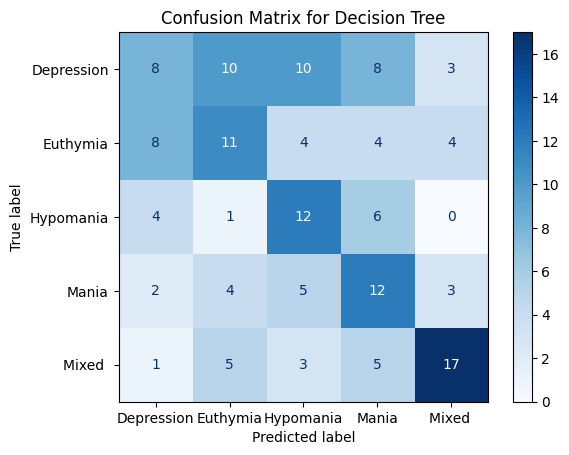


Random Forest Results:
Accuracy: 0.41
Precision: 0.41
Recall: 0.41
F1 Score: 0.40


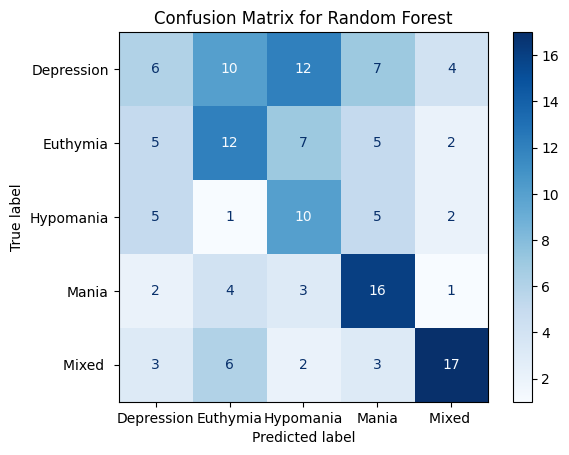


Logistic Regression Results:
Accuracy: 0.40
Precision: 0.44
Recall: 0.40
F1 Score: 0.39


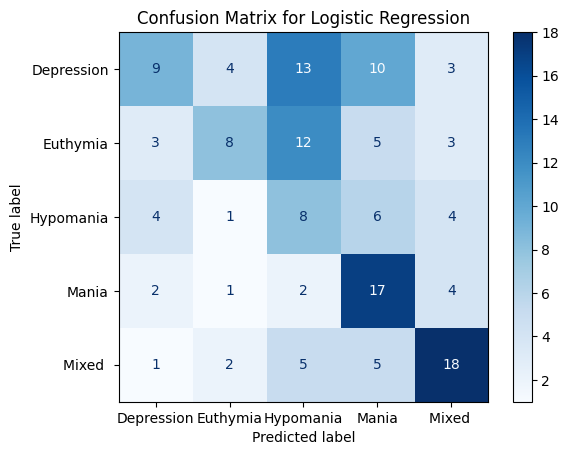

In [ ]:
# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # print(y_pred)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation results
    print(f'\n{model_name} Results:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv(r"C:\Users\OMOLP094\Desktop\Bipolar_Disorder_Phase_Classification\Datasets\heart_rate_dataset_bipolar_disorder_patients.csv")

In [ ]:
df = df.rename(columns={"Class label": "target"})
# Columns to use as features
cols = ['Age', 'Gender', 'Heart Rate']

# Features and target variable
X = df[cols].copy()
y = df['target']

In [ ]:
# Columns to use as features
cols = ['Age', 'Gender', 'Heart Rate']

# Features and target variable
X = df[cols].copy()
y = df['target']

In [ ]:

# Encode categorical features (Gender and target)
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])  # Male = 1, Female = 0
y = label_encoder.fit_transform(y)  # Encode the target as well


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Define the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)


In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for split quality
    'max_depth': [3, 5, 10, None],     # Max depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],    # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider at each split
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)


In [ ]:
# Fit the model with grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [ ]:
# Best estimator
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


Decision Tree (after tuning) Results:
Accuracy: 0.42
Precision: 0.47
Recall: 0.42
F1 Score: 0.40


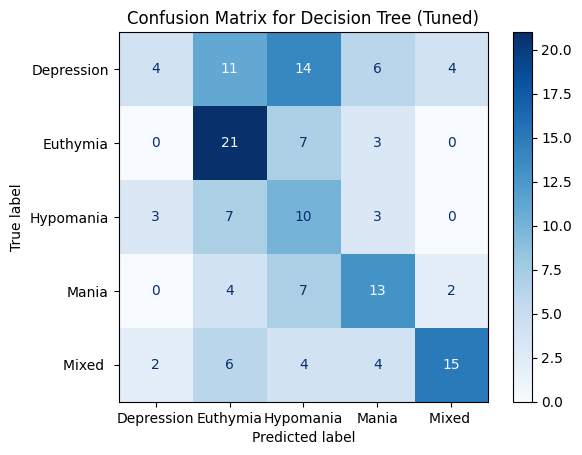

In [ ]:
# Print evaluation metrics
print(f'\nDecision Tree (after tuning) Results:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Decision Tree (Tuned)')
plt.show()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Accuracy: 0.43
Random Forest Precision: 0.41
Random Forest Recall: 0.43
Random Forest F1 Score: 0.40


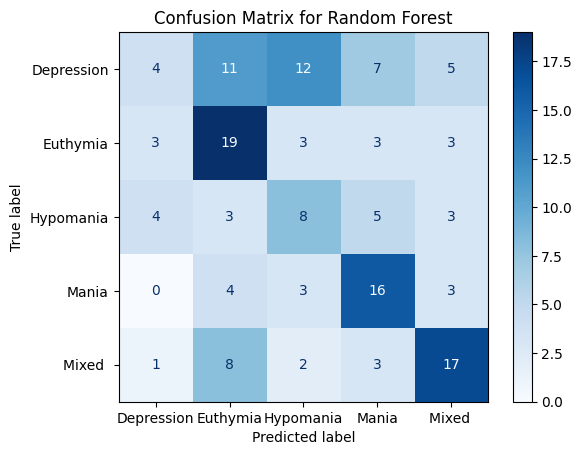

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20],             # Maximum depth of each tree
    'min_samples_split': [2, 10, 20],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 5, 10],          # Minimum number of samples in a leaf
    'max_features': ['sqrt', 'log2', None]   # Number of features to consider for the best split
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_params_rf}')

# Use the best model to predict on test data
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label_encoder.classes_)
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# Fit XGBoost
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')


XGBoost Accuracy: 0.41


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier()),
    ('svm', SVC())
]

# Define meta model
meta_model = LogisticRegression()

# Stacking Classifier
stack_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stack_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stack_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Stacking Model Accuracy: {accuracy_stack:.2f}')


C:\Users\OMOLP124\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OMOLP124\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

Stacking Model Accuracy: 0.44


C:\Users\OMOLP124\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.67
Random Forest Precision: 0.80
Random Forest Recall: 0.67
Random Forest F1 Score: 0.66


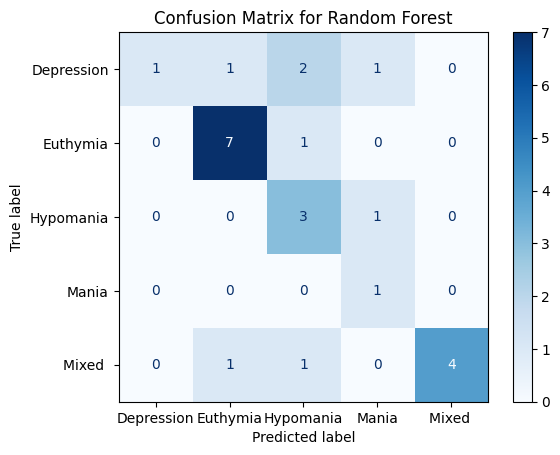

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df= pd.read_csv("C:\\Users\\OMOPC58\\Downloads\\heart_rate_dataset_bipolar_disorder_patients.csv")
df = df.rename(columns={"Class label": "target"})
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Creating interaction features
df['Age_HeartRate'] = df['Age'] * df['Heart Rate']

# Defining features and target
X = df[['Age', 'Heart Rate', 'Age_HeartRate', 'Gender_Male']]
y = df['target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0478, random_state=42)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, n_jobs=1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_params_rf}')

# Use the best model to predict on test data
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
pip install --upgrade numpy scikit-learn joblib



  Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [ ]:
df

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.81
Random Forest Precision: 0.82
Random Forest Recall: 0.81
Random Forest F1 Score: 0.81


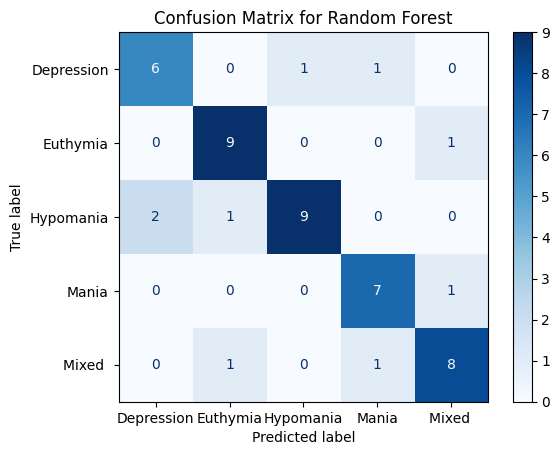

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df= pd.read_csv("C:\\Users\\OMOPC58\\Downloads\\dataaugmented.csv")
df = df.rename(columns={"Class label": "target"})
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Creating interaction features
df['Age_HeartRate'] = df['Age'] * df['Heart Rate']

# Defining features and target
X = df[['Age', 'Heart Rate', 'Age_HeartRate', 'Gender_Male']]
y = df['target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0478, random_state=42)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, n_jobs=1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_params_rf}')

# Use the best model to predict on test data
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
df.head(50)

,Age,Heart Rate,target,Gender_Male,Age_HeartRate
0,40,82,Depression,True,3280
1,38,86,Depression,True,3268
2,35,82,Depression,True,2870
3,58,67,Depression,True,3886
4,45,76,Depression,True,3420
5,55,87,Depression,False,4785
6,41,79,Depression,False,3239
7,45,80,Depression,False,3600
8,65,72,Depression,True,4680
9,42,86,Depression,True,3612


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'data' and target variable is 'target'
class_counts = df['target'].value_counts()
print(class_counts)


target
Depression    200
Hypomania     200
Mania         200
Euthymia      200
Mixed         200
Name: count, dtype: int64


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.62
Random Forest Precision: 0.54
Random Forest Recall: 0.62
Random Forest F1 Score: 0.57


C:\Users\OMOPC58\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


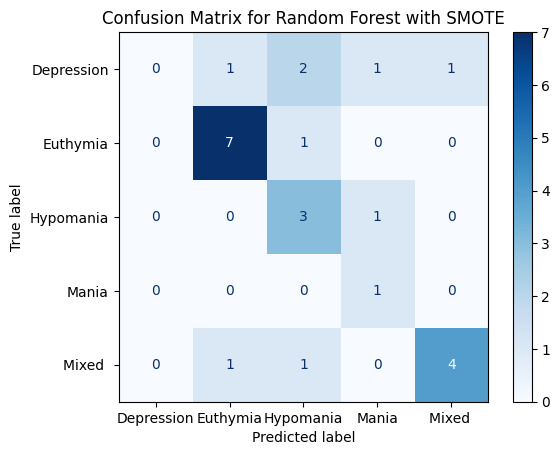

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("C:\\Users\\OMOPC58\\Downloads\\heart_rate_dataset_bipolar_disorder_patients.csv")
df = df.rename(columns={"Class label": "target"})
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df['Age_HeartRate'] = df['Age'] * df['Heart Rate']

# Define features and target
X = df[['Age', 'Heart Rate', 'Age_HeartRate', 'Gender_Male']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0478, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, n_jobs=1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train_smote)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_params_rf}')

# Use the best model to predict on test data
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest with SMOTE')
plt.show()


In [ ]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 487.6 kB/s eta 0:00:01
   ---------------------------------- ----- 225.3/258.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("C:\\Users\\OMOPC58\\Downloads\\heart_rate_dataset_bipolar_disorder_patients.csv")
df = df.rename(columns={"Class label": "target"})
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Feature Engineering: Create interaction and polynomial features
df['Age_HeartRate'] = df['Age'] * df['Heart Rate']  # Interaction feature
df['Age^2'] = df['Age'] ** 2                        # Polynomial feature
df['HeartRate^2'] = df['Heart Rate'] ** 2           # Polynomial feature

# Define features and target
X = df[['Age', 'Heart Rate', 'Age_HeartRate', 'Age^2', 'HeartRate^2', 'Gender_Male']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0478, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, n_jobs=1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_params_rf}')

# Use the best model to predict on test data
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest with Feature Engineering')
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.81
Random Forest Precision: 0.82
Random Forest Recall: 0.81
Random Forest F1 Score: 0.81


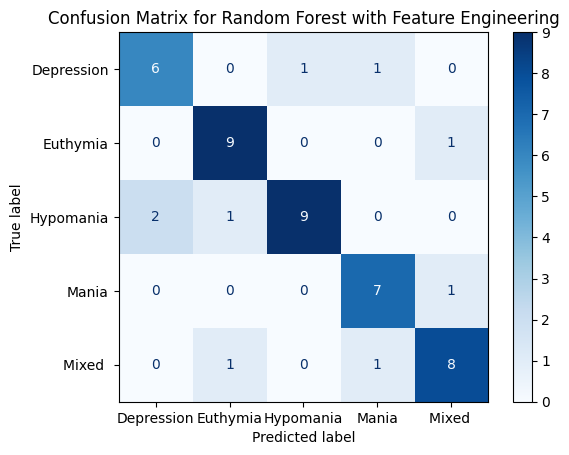

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv("C:\\Users\\OMOPC58\\Downloads\\dataaugmented.csv")
df = df.rename(columns={"Class label": "target"})
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Feature Engineering: Create interaction and polynomial features
df['Age_HeartRate'] = df['Age'] * df['Heart Rate']  # Interaction feature
df['Age^2'] = df['Age'] ** 2                        # Polynomial feature
df['HeartRate^2'] = df['Heart Rate'] ** 2           # Polynomial feature

# Define features and target
X = df[['Age', 'Heart Rate', 'Age_HeartRate', 'Age^2', 'HeartRate^2', 'Gender_Male']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0478, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, n_jobs=1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_params_rf}')

# Use the best model to predict on test data
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest with Feature Engineering')
plt.show()
